### Import Libraries

In [21]:

import pandas as pd
import numpy as np
import pathlib

from joblib import load

from utils.MlPipelineUtils import (
    get_features_data,
    get_dataset,
    get_X_y_data,
    evaluate_model_cm,
    evaluate_model_score
)

from sklearn.metrics import f1_score

### Evaluate best model

In [22]:
# results dir for loading/saving
results_dir = pathlib.Path("results/")

log_reg_model_path = pathlib.Path(f"{results_dir}/1.log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

# load training data from indexes and features dataframe
data_split_path = pathlib.Path("results/0.data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../1.format_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate with training data

In [23]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
X_training, y_training = get_X_y_data(training_data)
training_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
4,Polylobed,10.0,1212.640449,21.314607,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,1.764085,-0.364659,-0.623983,0.087524,-0.678471,-1.047430,0.119700,0.254014,0.080685,-0.808582
5,MetaphaseAlignment,42.0,69.902174,104.782609,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.030402,-0.306105,0.471312,1.111647,-0.395580,0.265579,0.337486,-0.728758,0.519263,1.143726
6,Interphase,72.0,517.024390,159.317073,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-2.070584,-0.419038,-0.716160,2.525790,-0.300407,0.243762,0.270543,0.473745,-1.024547,-0.401801
8,Artefact,100.0,748.324675,220.935065,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-0.834010,-0.404291,0.839559,0.230029,-0.322646,-0.254167,-0.602655,-0.273222,-0.722049,0.554533
9,Artefact,108.0,795.484536,242.752577,LT0043_48,166_55,1,LT0043_48_166_55,LT0043_48/166/55/LT0043_48_166_55.tif,OGG1,...,-1.406520,0.368818,0.568022,1.618059,-0.320691,0.527715,0.130431,-0.293846,-0.755968,0.025133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,SmallIrregular,70.0,645.173913,664.536232,LT0106_02,287_6,1,LT0106_02_287_6,LT0106_02/287/6/LT0106_02_287_6.tif,ENSG00000186143,...,0.481624,-0.066337,-0.298825,-1.073172,-0.263557,-0.922345,0.761749,0.721974,1.400016,-0.244034
4303,SmallIrregular,37.0,828.268657,338.328358,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.010054,2.490791,0.112932,-0.448705,-0.573112,-1.219449,0.756078,-0.434373,-0.617329,2.989479
4304,SmallIrregular,45.0,62.742424,384.424242,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,0.828838,2.328690,2.365700,-1.219878,-0.377726,0.285707,0.072360,-0.101487,0.592109,-0.326425
4306,SmallIrregular,52.0,105.014085,429.056338,LT0106_02,287_33,1,LT0106_02_287_33,LT0106_02/287/33/LT0106_02_287_33.tif,ENSG00000186143,...,-0.890952,0.301522,0.345463,0.594489,0.737245,3.037339,-0.636915,0.061156,1.849867,-0.896322


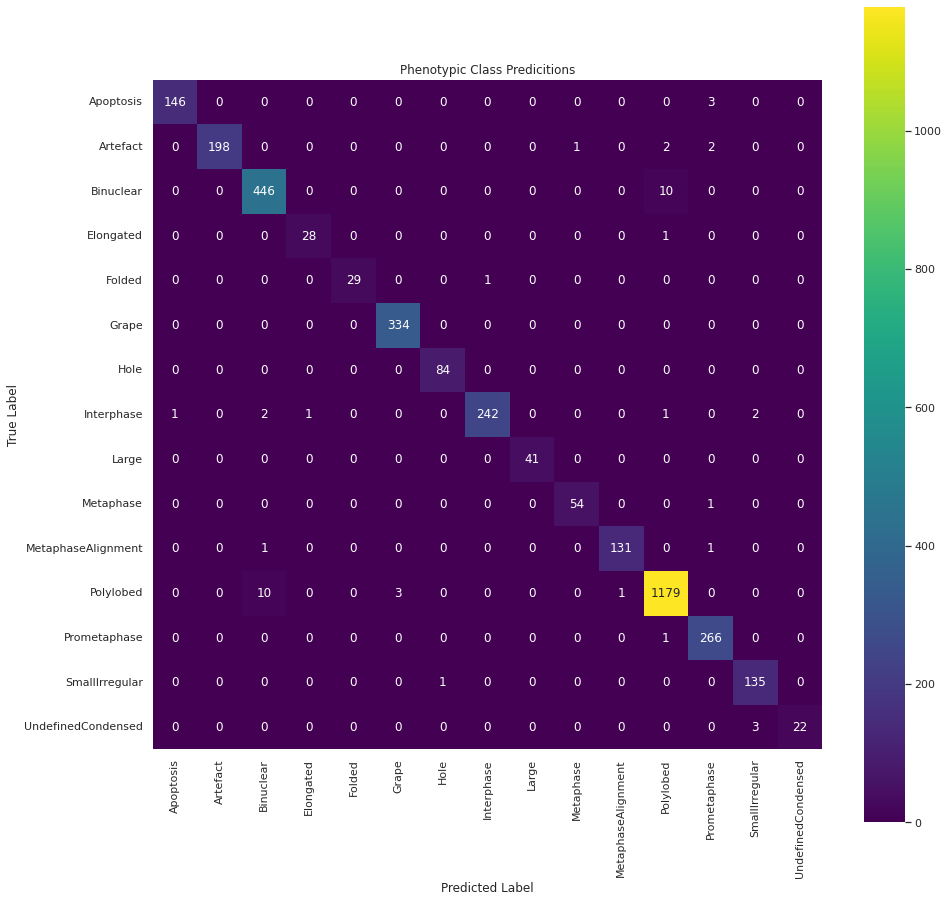

In [24]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

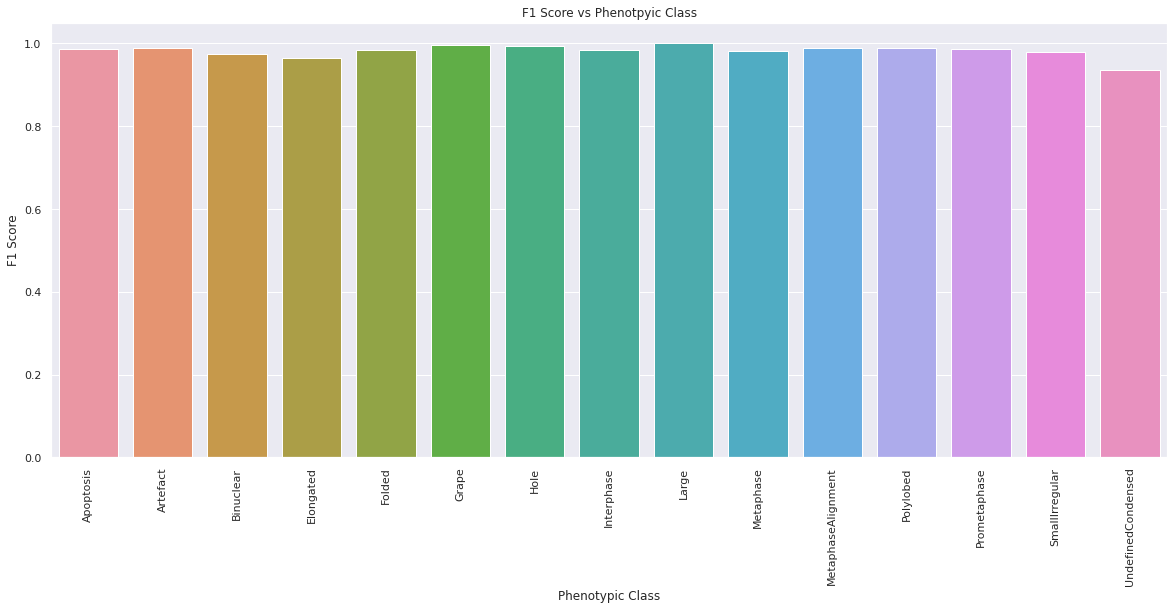

In [25]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [26]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
2870,MetaphaseAlignment,149.0,454.027778,950.986111,LT0048_14,335_1,1,LT0048_14_335_1,LT0048_14/335/1/LT0048_14_335_1.tif,PLK1,...,0.196526,0.614240,1.348091,0.117122,-0.268561,0.500906,0.276500,-0.355538,1.996978,0.132982
3368,Polylobed,64.0,797.109756,361.146341,LT0065_04,020_72,1,LT0065_04_020_72,LT0065_04/020/72/LT0065_04_020_72.tif,CDCA8,...,-0.619479,-1.074067,-0.603727,1.160229,0.364640,1.047486,-0.816635,-1.083802,0.409243,0.467083
839,Polylobed,145.0,331.379310,673.333333,LT0023_04,005_64,1,LT0023_04_005_64,LT0023_04/005/64/LT0023_04_005_64.tif,MYST1,...,-0.881473,0.947587,-0.784239,0.548506,-0.403138,0.782461,0.598620,-0.654396,-0.522331,0.021034
192,Polylobed,182.0,139.017544,418.000000,LT0043_48,166_47,1,LT0043_48_166_47,LT0043_48/166/47/LT0043_48_166_47.tif,OGG1,...,-1.345317,-0.086326,1.075846,-0.744400,-0.105706,-1.124249,-0.788473,0.265429,-2.126001,-0.116318
3692,Polylobed,171.0,1316.233333,680.400000,LT0100_03,093_37,1,LT0100_03_093_37,LT0100_03/093/37/LT0100_03_093_37.tif,ENSG00000148826,...,-0.462157,-0.431388,-0.870889,1.062673,-0.433894,-0.722961,-0.429625,-0.541418,-0.652615,0.406601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Grape,181.0,1271.333333,593.981481,LT0066_19,287_75,1,LT0066_19_287_75,LT0066_19/287/75/LT0066_19_287_75.tif,ch-TOG,...,-0.446474,-0.687139,-0.157750,-0.163901,-0.870577,0.006323,-1.186835,-0.396017,-1.056902,0.937667
504,Prometaphase,115.0,606.409091,724.166667,LT0064_14,003_54,1,LT0064_14_003_54,LT0064_14/003/54/LT0064_14_003_54.tif,TPX2,...,0.197184,-0.325681,-0.309695,-0.376247,0.075582,0.060717,-0.156184,0.422307,2.116743,-1.299578
1852,Polylobed,123.0,996.867347,904.336735,LT0027_44,030_74,1,LT0027_44_030_74,LT0027_44/030/74/LT0027_44_030_74.tif,ECT2,...,0.250336,-0.141311,-0.564566,-0.875810,1.753895,-0.941061,-0.315415,-0.065306,-0.761703,-0.787475
2232,Binuclear,94.0,256.354839,957.677419,LT0067_02,099_37,1,LT0067_02_099_37,LT0067_02/099/37/LT0067_02_099_37.tif,ANLN,...,0.498423,0.071943,0.030666,-1.086978,7.265947,-1.336207,-0.816161,0.725007,-0.638215,-0.336124


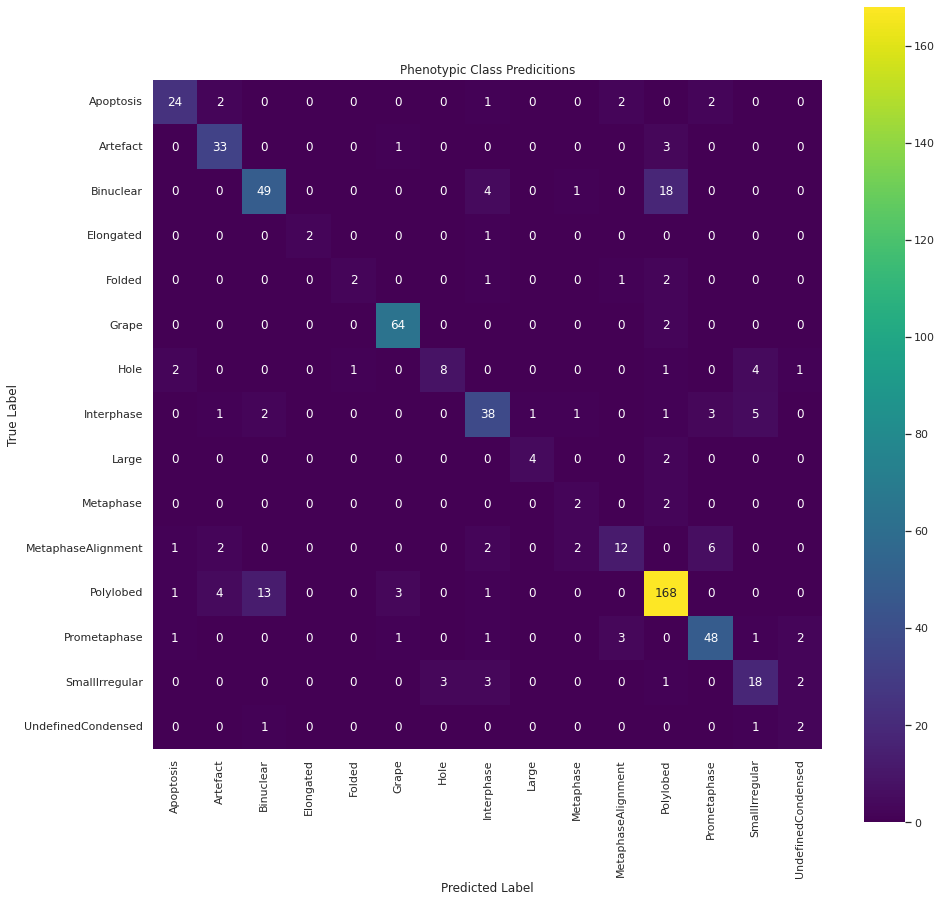

In [27]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

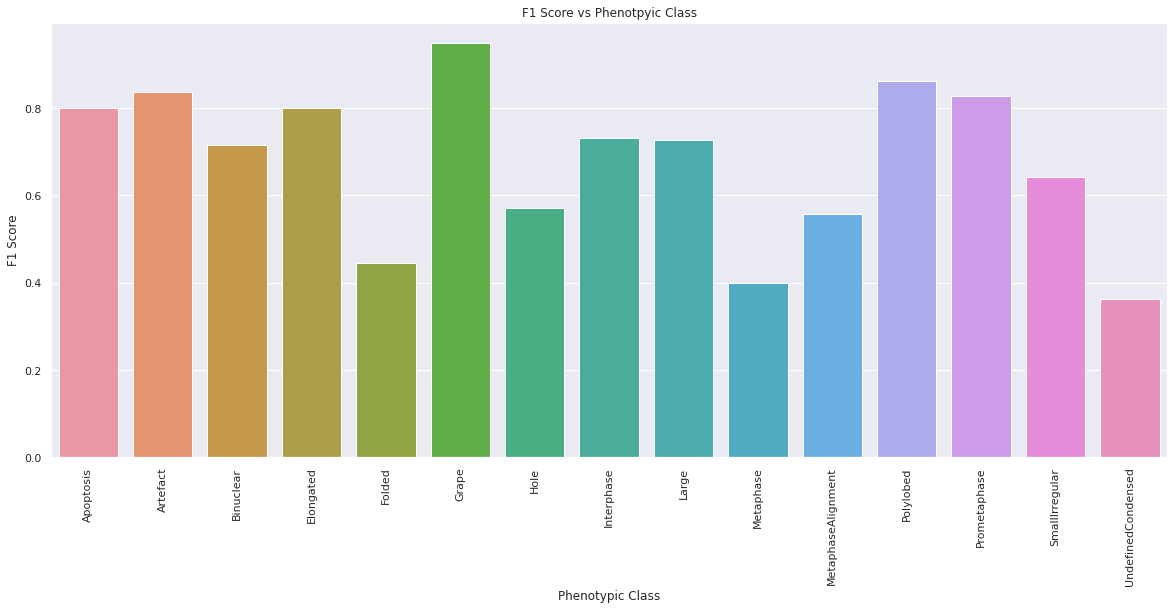

In [28]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [29]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Mitocheck_Object_ID,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
2439,Elongated,15.0,1050.180723,80.734940,LT0109_38,338_80,1,LT0109_38_338_80,LT0109_38/338/80/LT0109_38_338_80.tif,Eg5,...,2.029269,-0.529446,-0.091925,-0.762612,-0.571097,0.320808,-0.314893,0.604119,0.686463,-0.869729
2440,Interphase,20.0,1111.985714,119.785714,LT0109_38,338_80,1,LT0109_38_338_80,LT0109_38/338/80/LT0109_38_338_80.tif,Eg5,...,-0.496399,-0.508839,-0.511547,0.787320,0.158370,-0.793538,0.072149,0.776259,-0.203388,0.291374
2441,Interphase,21.0,1208.000000,125.216495,LT0109_38,338_80,1,LT0109_38_338_80,LT0109_38/338/80/LT0109_38_338_80.tif,Eg5,...,0.301925,-0.584430,-0.881478,-1.051429,0.436688,0.340846,0.434544,-0.370043,1.434905,-1.145019
2442,Interphase,22.0,1114.206897,160.333333,LT0109_38,338_80,1,LT0109_38_338_80,LT0109_38/338/80/LT0109_38_338_80.tif,Eg5,...,0.359323,1.512590,-0.295478,0.966126,-0.003489,-0.281269,0.398708,0.583035,0.663146,1.175344
2443,Apoptosis,25.0,758.403509,177.789474,LT0109_38,338_80,1,LT0109_38_338_80,LT0109_38/338/80/LT0109_38_338_80.tif,Eg5,...,0.607199,-0.274202,1.169405,-0.966883,-0.601837,0.949108,0.451148,-0.030628,2.063781,-0.834666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Polylobed,240.0,401.516667,937.950000,LT0157_04,005_61,1,LT0157_04_005_61,LT0157_04/005/61/LT0157_04_005_61.tif,ENSG00000175216,...,-0.376751,0.396171,-0.211405,0.674914,-0.698920,-0.531402,-0.781240,0.486083,-0.492085,0.635026
3344,Grape,234.0,373.285714,941.142857,LT0157_04,005_61,1,LT0157_04_005_61,LT0157_04/005/61/LT0157_04_005_61.tif,ENSG00000175216,...,-0.819932,0.107351,-0.342587,0.095413,-0.952625,-1.376695,-1.217101,-0.554010,-0.922698,0.020927
3345,Grape,243.0,30.536585,957.182927,LT0157_04,005_61,1,LT0157_04_005_61,LT0157_04/005/61/LT0157_04_005_61.tif,ENSG00000175216,...,0.849502,-0.813997,-0.293242,-0.957677,-0.867900,0.073707,-0.824198,0.009210,0.025933,0.633812
3346,Grape,243.0,36.736842,970.491228,LT0157_04,005_61,1,LT0157_04_005_61,LT0157_04/005/61/LT0157_04_005_61.tif,ENSG00000175216,...,0.740610,-0.899249,-0.292376,-1.040122,-0.699478,-0.327455,-0.745205,0.620779,0.095935,0.649545


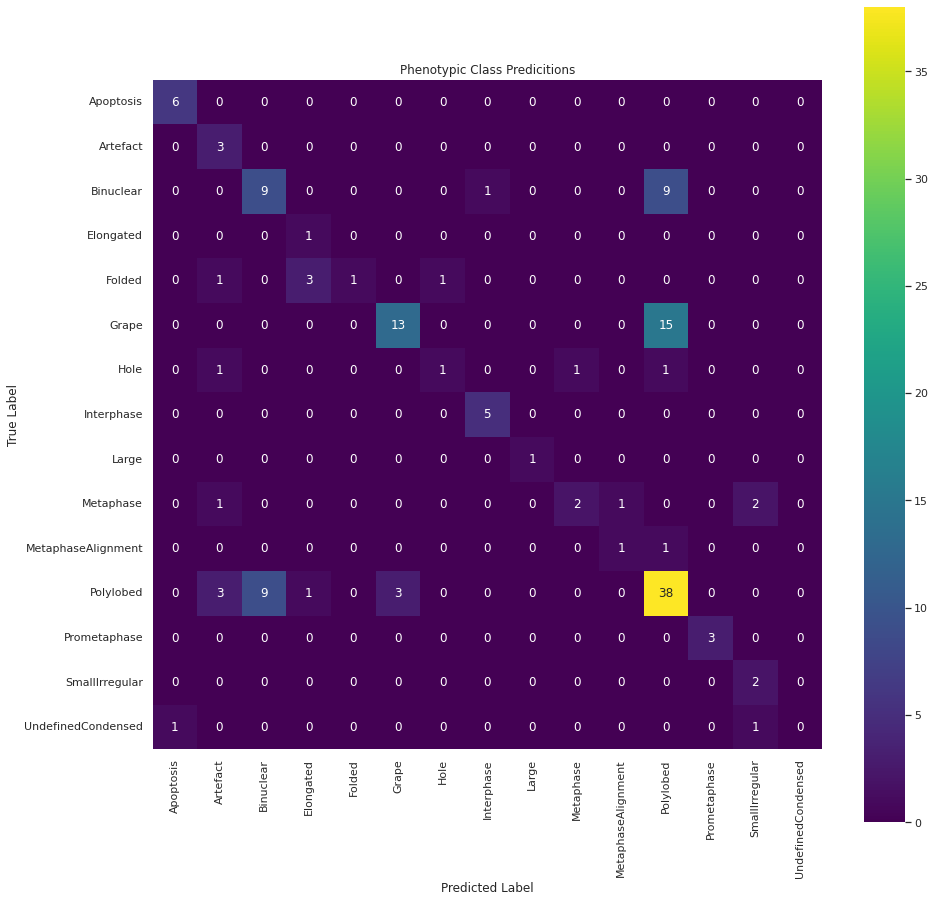

In [30]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

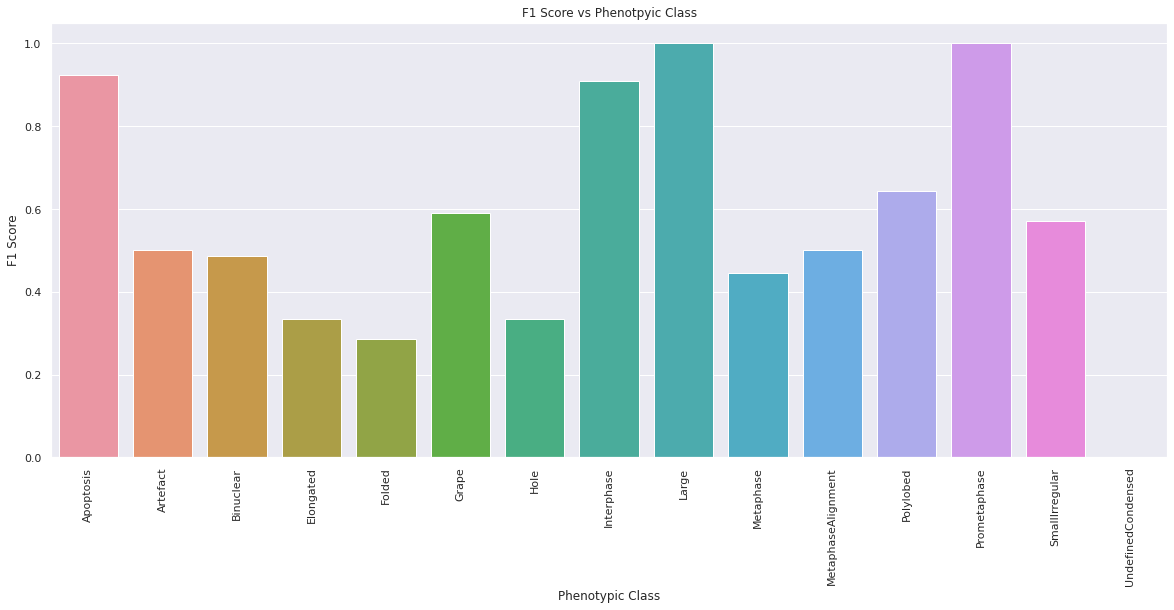

In [31]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [32]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [33]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{results_dir}/1.shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

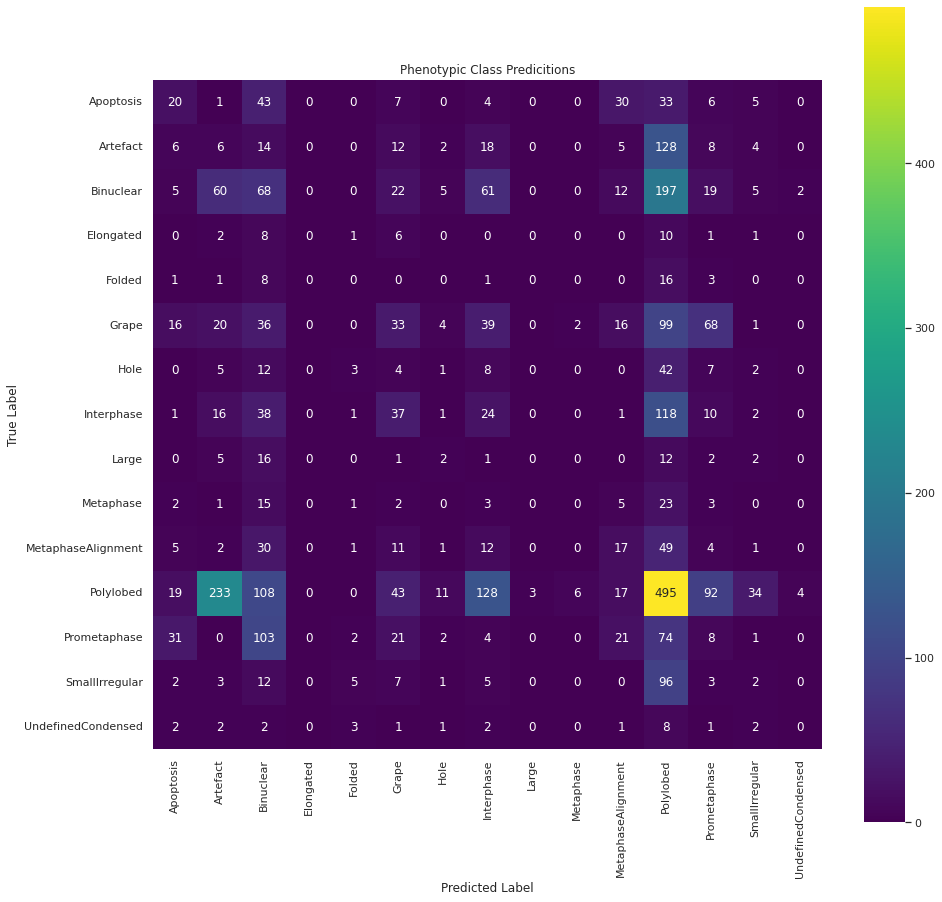

In [34]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

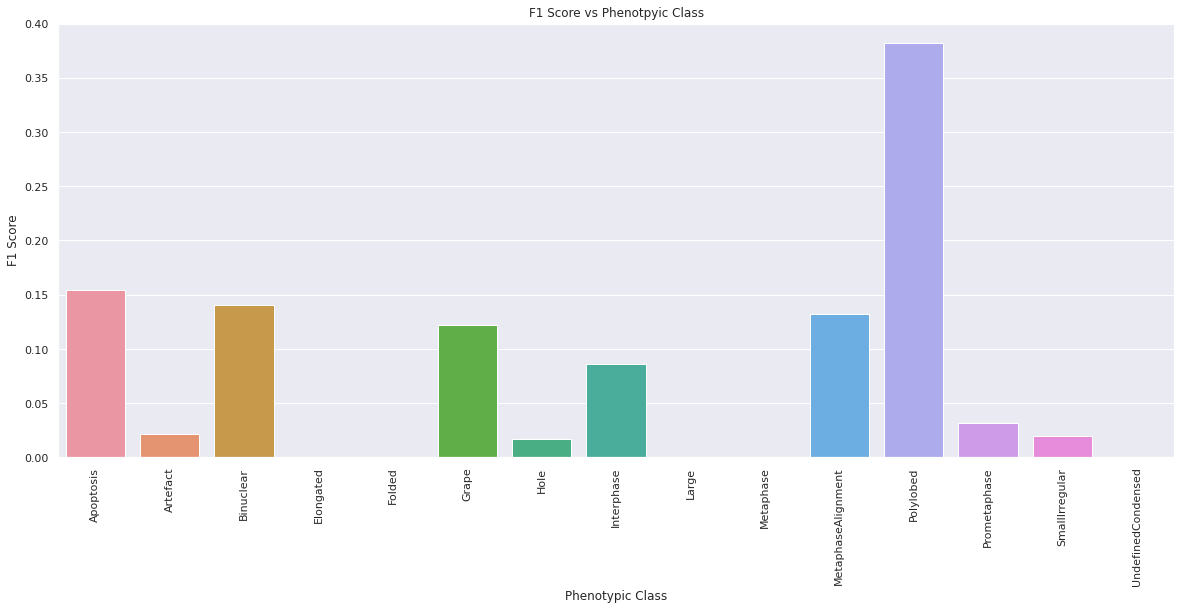

In [35]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

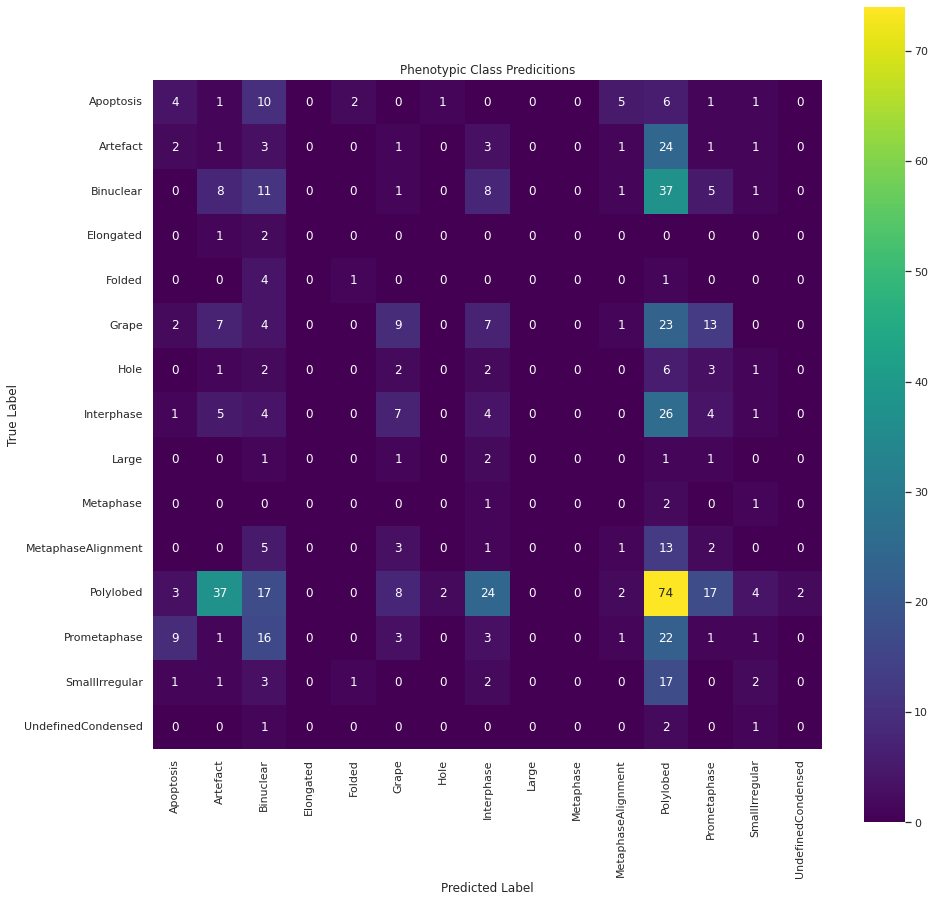

In [36]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

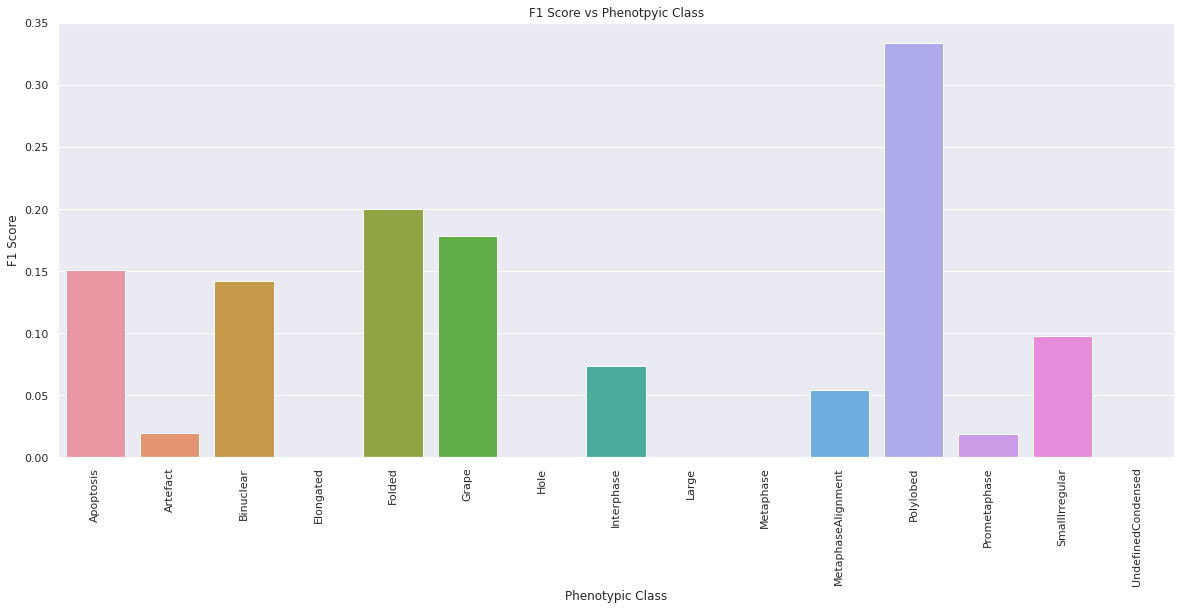

In [37]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

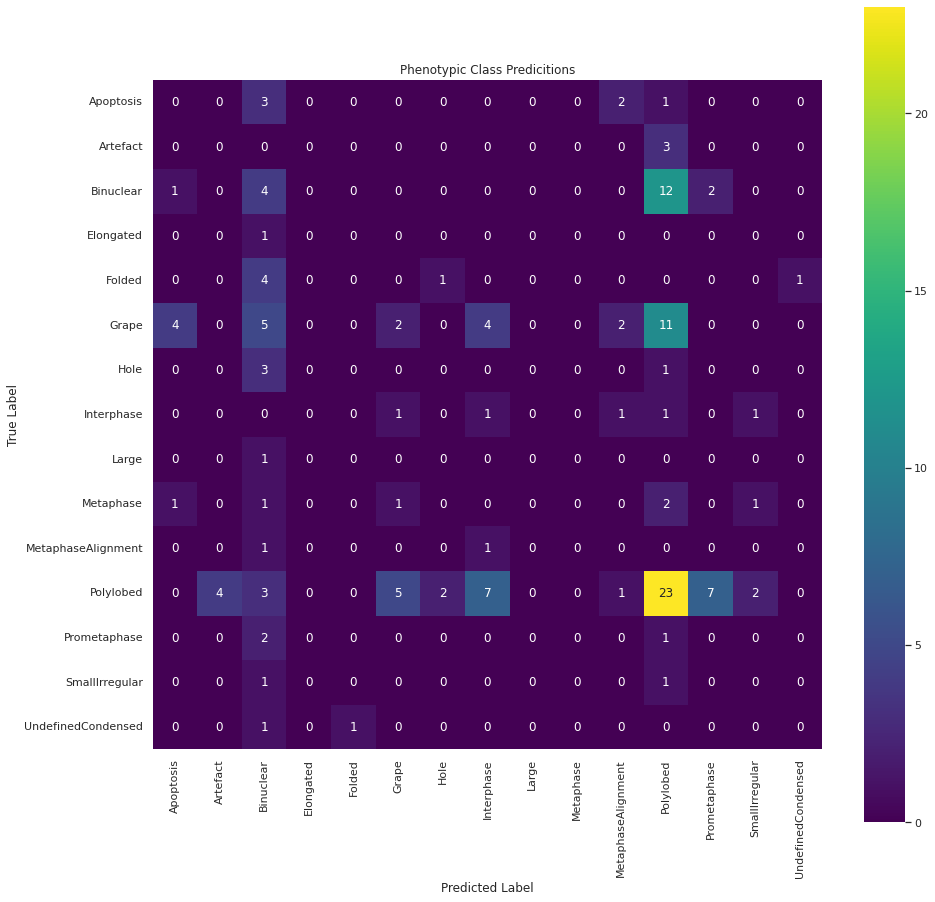

In [38]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

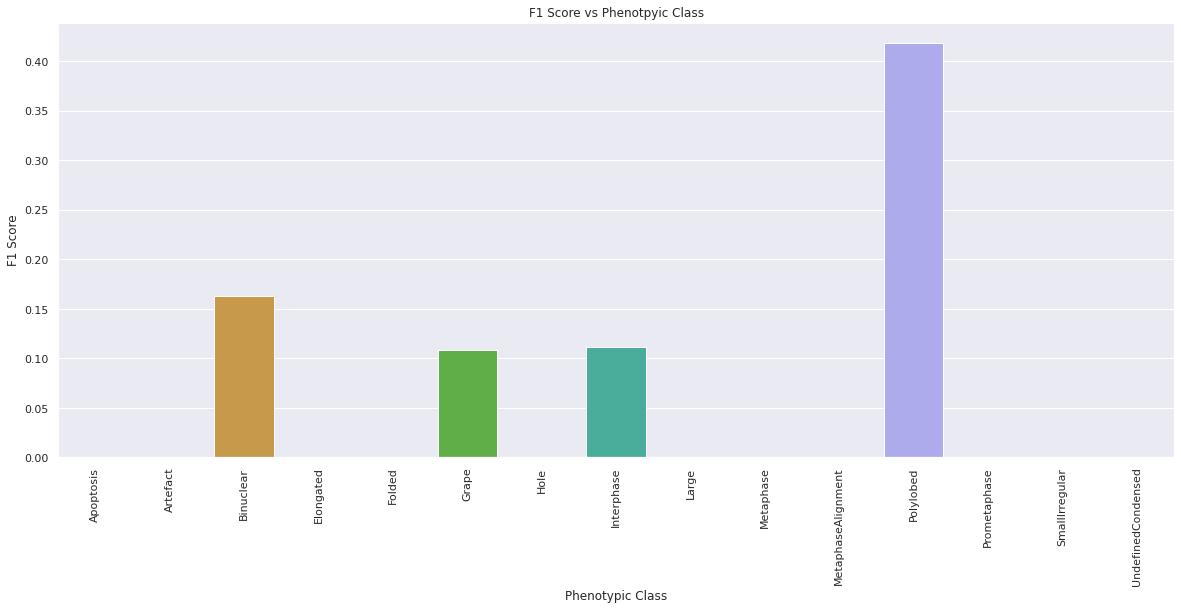

In [39]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [40]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/2.shuffled_baseline_model_predictions.tsv", sep="\t")